In [ ]:
# git clone https://github.com/dmlc/gluon-cv
# cd gluon-cv && python setup.py install --user

Found 11 images in the folder ./data/cityscapes\leftImg8bit/train
Found 9 images in the folder ./data/cityscapes\leftImg8bit/val


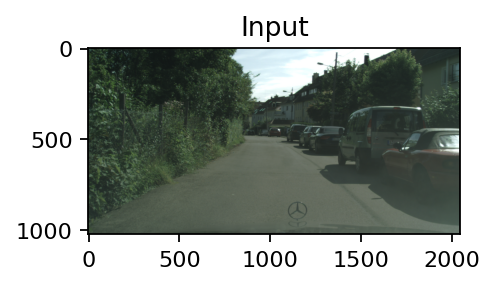

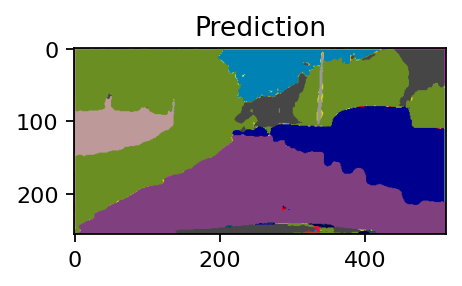

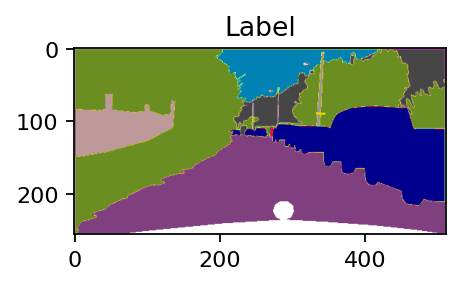

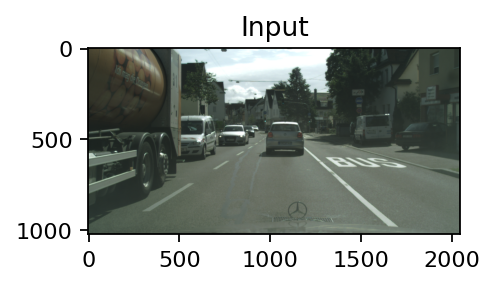

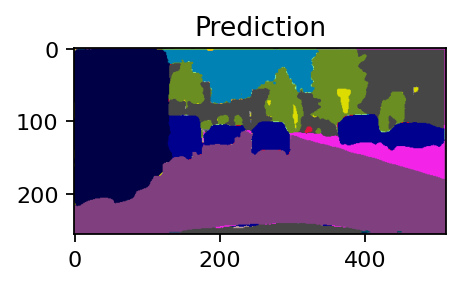

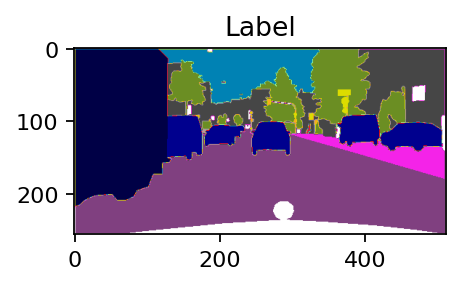

In [106]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gluoncv.utils.viz import get_color_pallete

import torch
from dataset import get_dataloaders

### IMPORANT ###
# remember to change your the path
modelpath = "./model_data_scrpits/checkpoint/smp_unet_35.pth"
logpath = "./model_data_scrpits//train_log/nohup_35.out"

def parse_log(path):
    train_loss = []
    train_acc = []
    train_miou = []
    val_loss = []
    val_acc = []
    val_miou = []
    with open(path, 'r', encoding='utf-8') as f:
        data = f.readlines()
    for l in data:
        if l.startswith('train_loss'):
            train_loss.append(float(l.split()[1]))
        if l.startswith('train_acc'):
            train_acc.append(float(l.split()[1]))
        if l.startswith('train_iou'):
            train_miou.append(float(l.split()[1]))
        if l.startswith('val_loss'):
            val_loss.append(float(l.split()[1]))
        if l.startswith('val_acc'):
            val_acc.append(float(l.split()[1]))
        if l.startswith('val_miou'):
            val_miou.append(float(l.split()[1]))
    
    return train_loss, train_acc, train_miou, val_loss, val_acc, val_miou

def plot_train_val(train_loss, train_acc, train_miou, val_loss, val_acc, val_miou):
    print(train_loss)
    print(train_miou)
    print(train_acc)
    x = np.arange(len(train_loss))+1
    fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k', frameon=True)

    plt.subplot(131)
    t = plt.plot(x, train_loss, 'b')
    v = plt.plot(x, val_loss, 'r')
    plt.legend([t[0], v[0]], ["train", "val"]) # loc='lower right', fontsize=16, frameon=False
    plt.xlabel("Epoch") # fontsize=14
    plt.title("Loss")

    plt.subplot(132)
    t = plt.plot(x, train_acc, 'b')
    v = plt.plot(x, val_acc, 'r')
    plt.legend([t[0], v[0]], ["train", "val"]) # loc='lower right', fontsize=16, frameon=False
    plt.xlabel("Epoch") # fontsize=14
    plt.title("Accuracy")


    plt.subplot(133)
    t = plt.plot(x, train_miou, 'b')
    v = plt.plot(x, val_miou, 'r')
    plt.legend([t[0], v[0]], ["train", "val"]) # loc='lower right', fontsize=16, frameon=False
    plt.xlabel("Epoch") # fontsize=14
    plt.title("Mean IOU")

    fig.savefig("analysis_epoch_%s.png" %(str(len(train_loss))),dpi=80,bbox_inches='tight')

def plot_generated_figures(model, loader):
    for i, (images, targets, filenames) in enumerate(train_loader):
        if i > 0:
            break
        fig = plt.figure(num=None, figsize=(3, 6), dpi=160, facecolor='w', edgecolor='k', frameon=True)
        plt.title('Input')
        city = filenames[0].split('_')[0]
        try:
            split = 'train'
            plt.imshow(cv2.imread('./data/cityscapes/leftImg8bit/' + split + '/' + city + '/'+ filenames[0])[:,:,::-1])
        except:
            split = 'val'
            plt.imshow(cv2.imread('./data/cityscapes/leftImg8bit/' + split + '/' + city + '/'+ filenames[0])[:,:,::-1])
            
        
        outputs = model(images).detach()[0].argmax(dim=0)
        
        outputs = get_color_pallete(outputs.numpy(), dataset='citys')
        fig = plt.figure(num=None, figsize=(3, 6), dpi=160, facecolor='w', edgecolor='k', frameon=True)
        plt.title('Prediction')
        plt.imshow(outputs)
        
        targets = get_color_pallete(targets[0].numpy(), dataset='citys')
        fig = plt.figure(num=None, figsize=(3, 6), dpi=160, facecolor='w', edgecolor='k', frameon=True)
        plt.title('Label')
        plt.imshow(targets)

if __name__ == "__main__":
    # parse the loss, acc, miou and make plots
    train_loss, train_acc, train_miou, val_loss, val_acc, val_miou = parse_log(logpath)
    # plot_train_val(train_loss, train_acc, train_miou, val_loss, val_acc, val_miou)

    # load in the model, visualize the figure generator
    model = torch.load(modelpath)
    model.eval()
    train_loader, val_loader = get_dataloaders()
    plot_generated_figures(model, train_loader)
    plot_generated_figures(model, val_loader)